In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"C:\Users\Abhim\Documents\Python_Programs\airfare_dset\Cleaned_dataset.csv"
df = pd.read_csv(file)

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

In [3]:
df = df.dropna()
df.drop_duplicates( keep='first', inplace=True)
df = df.reset_index(drop = True)
df.shape

(445366, 13)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Class'] = le.fit_transform(df['Class'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Arrival'] = le.fit_transform(df['Arrival'])
df['Departure'] = le.fit_transform(df['Departure'])
df['Journey_day'] = le.fit_transform(df['Journey_day'])
df['Flight_code'] = le.fit_transform(df['Flight_code'])
df['Total_stops'] = le.fit_transform(df['Total_stops'])

{'Air India': 0, 'AirAsia': 1, 'AkasaAir': 2, 'AllianceAir': 3, 'GO FIRST': 4, 'Indigo': 5, 'SpiceJet': 6, 'StarAir': 7, 'Vistara': 8}
{'Business': 0, 'Economy': 1, 'First': 2, 'Premium Economy': 3}


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [6]:
passengers_df = df.groupby(['Airline', 'Date_of_journey', 'Flight_code', 'Class']).agg(
    total_passengers=('Fare', 'size'),
    average_fare=('Fare', 'mean'),
    Source=('Source', 'first'),
    Destination=('Destination', 'first'),
    Journey_day=('Journey_day', 'first'),
    Days_left=('Days_left', 'mean'),
    Arrival=('Arrival', 'first'),
    Departure=('Departure', 'first'),
    Duration_in_hours=('Duration_in_hours', 'first'),
    Total_stops=('Total_stops', 'first')
).reset_index()

# Rename columns if necessary
passengers_df.rename(columns={'Fare': 'average_fare'}, inplace=True)

passengers_df

,Airline,Date_of_journey,Flight_code,Class,total_passengers,average_fare,Source,Destination,Journey_day,Days_left,Arrival,Departure,Duration_in_hours,Total_stops
0,0,2023-01-16,713,0,15,55872.866667,5,3,1,1.0,0,1,2.5000,2
1,0,2023-01-16,713,1,4,15195.750000,5,3,1,1.0,0,1,2.5000,2
2,0,2023-01-16,715,0,1,67366.000000,3,6,1,1.0,0,1,5.5833,0
3,0,2023-01-16,717,0,2,48093.500000,3,6,1,1.0,0,1,9.3333,0
4,0,2023-01-16,718,1,1,12286.000000,3,6,1,1.0,0,0,24.5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77506,8,2023-03-06,1402,1,13,9208.076923,3,6,1,50.0,0,1,2.2500,2
77507,8,2023-03-06,1402,3,9,10954.000000,3,6,1,50.0,0,1,2.2500,2
77508,8,2023-03-06,1403,0,19,55887.947368,6,3,1,50.0,2,2,2.1667,2
77509,8,2023-03-06,1403,1,14,10941.857143,6,3,1,50.0,2,2,2.1667,2


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

models_dict = {}

passengers_df.sort_values(by='Date_of_journey')

X=passengers_df.drop(['total_passengers'],axis=1)
y=passengers_df['total_passengers']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,Airline,Date_of_journey,Flight_code,Class,average_fare,Source,Destination,Journey_day,Days_left,Arrival,Departure,Duration_in_hours,Total_stops
581,0,2023-01-18,770,1,12465.000000,3,5,6,-1.578452,1,2,1.579674,0
15483,1,2023-02-03,1040,1,4827.000000,3,6,0,-0.466065,1,2,1.471318,0
53240,5,2023-03-06,167,1,7329.000000,6,2,1,1.689185,2,0,-0.030294,0
55634,6,2023-02-14,1209,1,6346.000000,3,6,5,0.298701,2,2,-0.819795,2
52362,5,2023-03-04,480,1,5060.333333,3,6,2,1.550136,2,0,0.031640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,2023-02-08,765,0,37007.200000,3,6,6,-0.118444,3,0,0.139996,0
54886,6,2023-02-03,1175,1,9801.000000,2,3,0,-0.466065,0,0,3.777887,0
76820,8,2023-03-05,1303,0,46393.600000,3,6,3,1.619660,0,1,0.139996,0
860,0,2023-01-19,779,1,7913.666667,6,1,4,-1.508928,0,0,2.229852,0


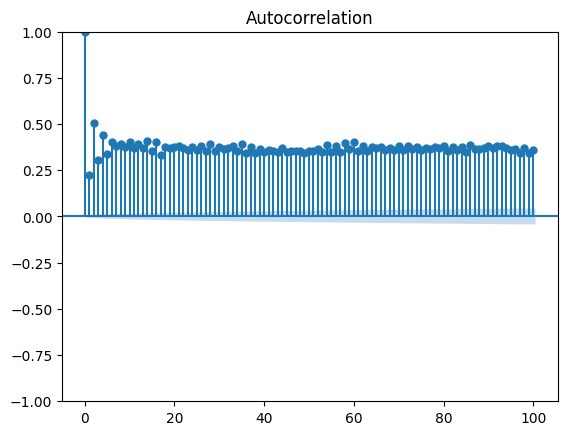

In [8]:
# subset = passengers_df
subset = passengers_df[passengers_df["Class"] == 1]
# subset = subset[subset["Airline"] == 0]
plot_acf(subset['total_passengers'], lags=100)
print()



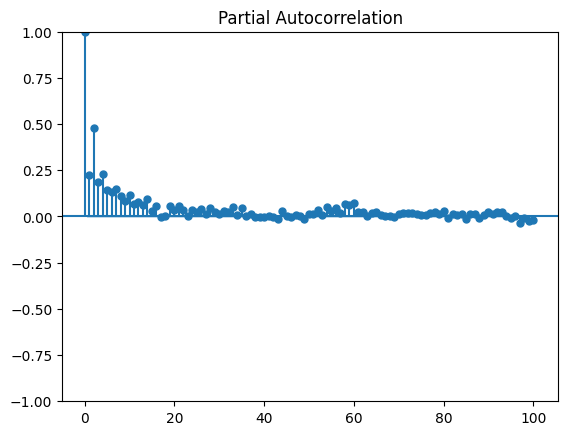

In [9]:
plot_pacf(subset['total_passengers'], lags=100)
print()

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

dict = {}

result = adfuller(subset['total_passengers'])
dict["Results"] = (result[0], result[1])

'''except ValueError as e:
        print(f"ValueError for {destination}: {e}")
        dict[destination] = (None, None)'''

results_df = pd.DataFrame(dict).T
results_df.columns = ["ADF Statistic", "p-value"]

results_df

,ADF Statistic,p-value
Results,-5.400533,0.000003


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [12]:
import pmdarima as pm

model = pm.auto_arima(subset['total_passengers'], seasonal=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=332241.536, Time=19.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=388971.546, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=352871.861, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=388969.546, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=332331.167, Time=13.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=332362.394, Time=12.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=332242.834, Time=13.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=332122.001, Time=38.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=332253.524, Time=16.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=332226.259, Time=25.34 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=332252.295, Time=23.42 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=332229.982, Time=31.95 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=332310.913, Time=44.09 sec
 A

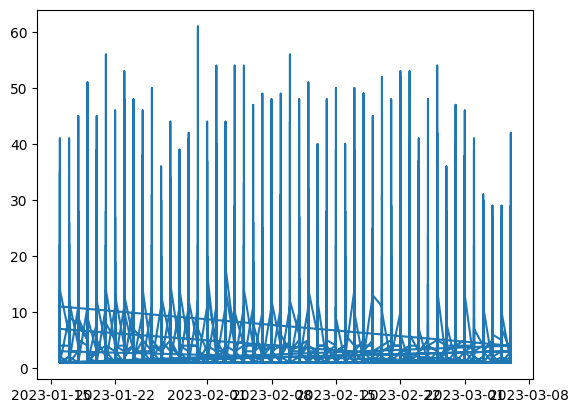

In [13]:
plt.plot ("Date_of_journey", "total_passengers", data=subset)

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = subset['total_passengers']
print (y.shape)


# Split the df into train and test
train_size = int(len(subset) * 0.8)

train = y[0:train_size]
test = y[train_size:len(subset)]

# Fit the ARIMA model on the training dataset
model = SARIMAX(subset['total_passengers'], order=(2, 1, 3))
model_fit = model.fit()
# print(model_fit.summary())
if model_fit:
    print("Model fitting successful.")



(57908,)


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model fitting successful.


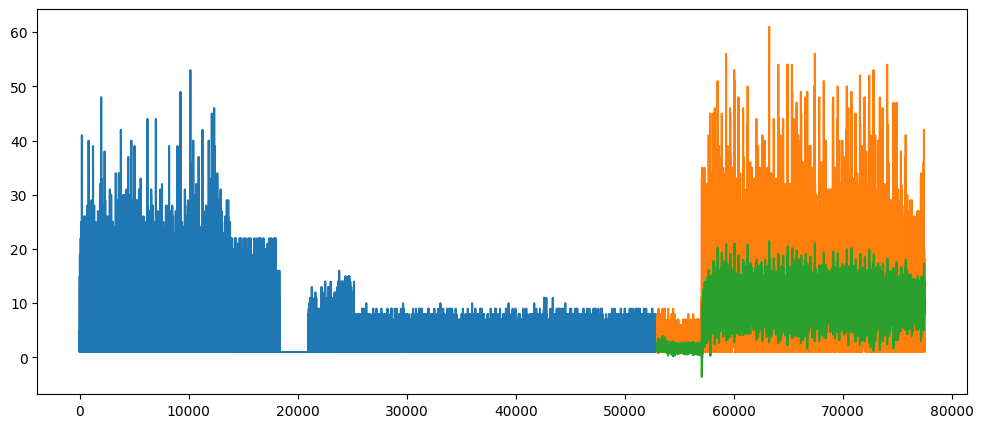

In [15]:
start = train_size  # Example start point for in-sample predictions
end = len(subset) - 1  # Example end point for in-sample predictions
predictions = model_fit.predict(start=start, end=end, dynamic=False)

plt.figure(figsize=(12,5))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predictions')

In [16]:
def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {RMSE(test, predictions)}")
print(f"MAPE: {MAPE(test, predictions)}")

models_dict["SARIMAX"] = [model, RMSE(test, predictions), MAPE(test, predictions)]

RMSE: 6.841137705396885
MAPE: 124.32531731407101


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

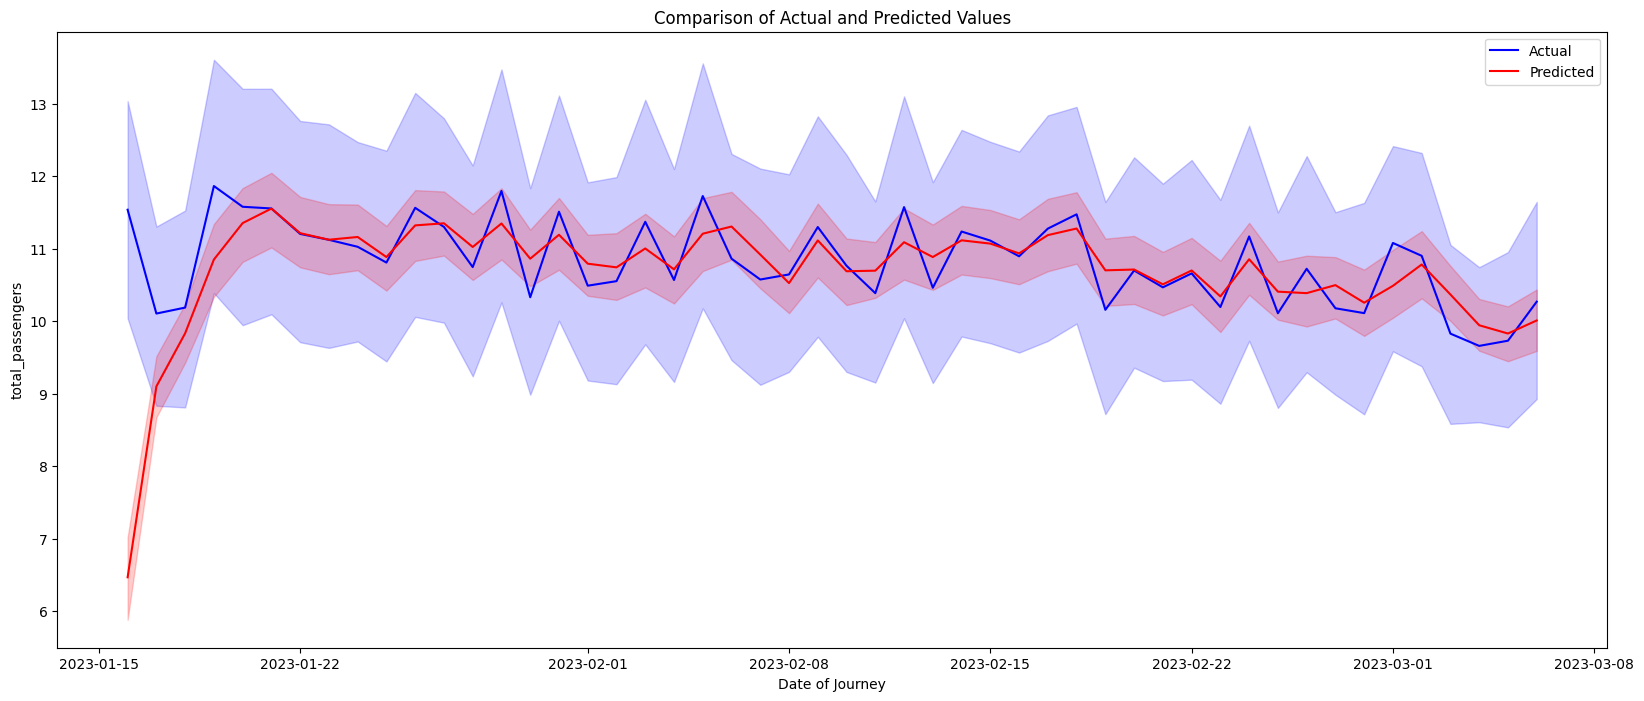

In [17]:
out=pd.DataFrame({'demand_actual':test,'demand_pred':predictions})
result=passengers_df.merge(out,left_index=True,right_index=True)

airline_df = result[result['Airline']==8]
airline_df = airline_df[airline_df['Class']==1]

plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='demand_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='demand_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('total_passengers')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

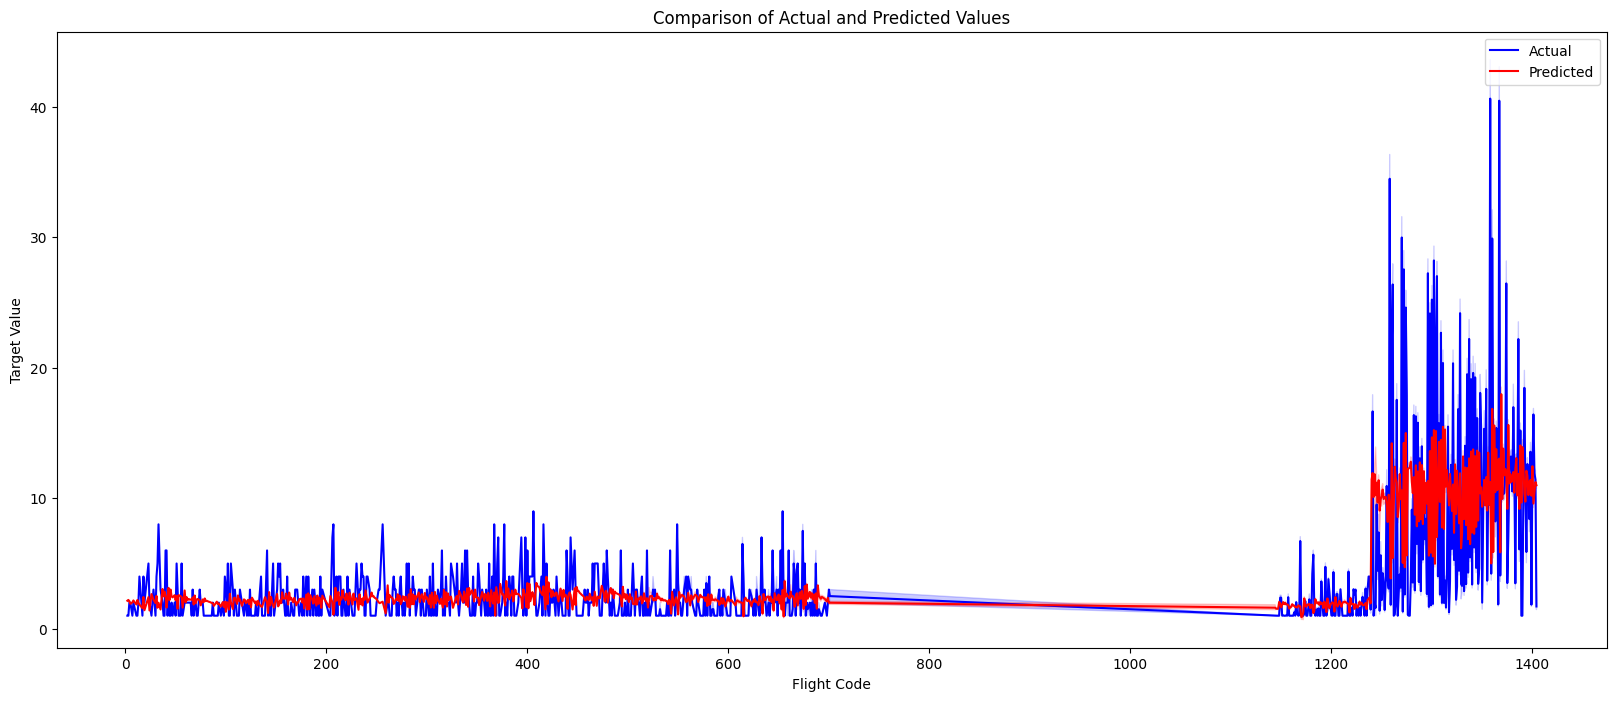

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='demand_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='demand_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

X = subset.drop(['total_passengers', "Date_of_journey"], axis=1)
y = subset['total_passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(f"RMSE: {RMSE(y_test, y_preds)}")
print(f"MAPE: {MAPE(y_test, y_preds)}")

models_dict["RandomForestRegressor"] = [model, RMSE(y_test, y_preds), MAPE(y_test, y_preds)]

RMSE: 1.335438156537437
MAPE: 13.814757888230533


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

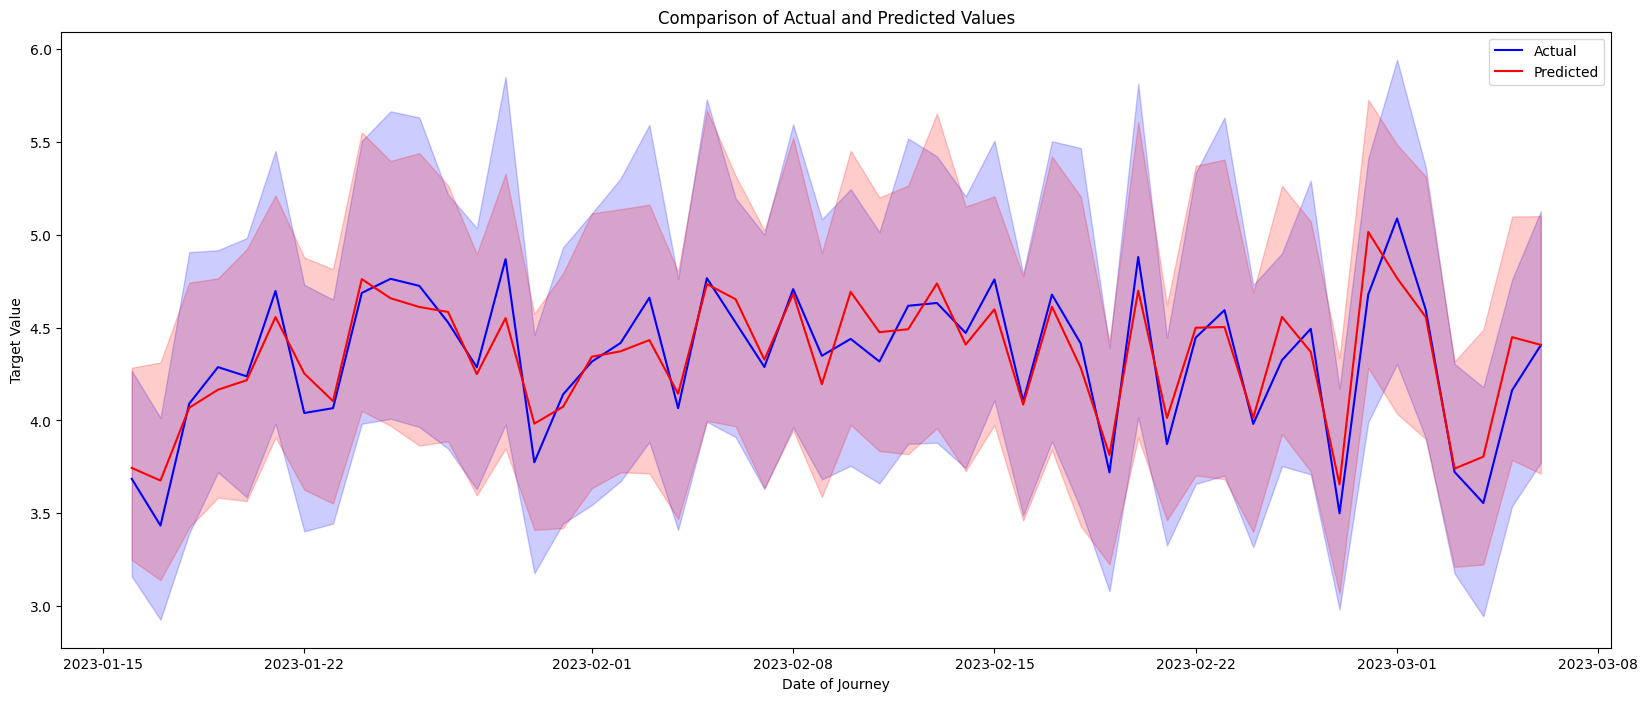

In [21]:
out=pd.DataFrame({'demand_actual':y_test,'demand_pred':y_preds})
result= subset.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='demand_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='demand_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

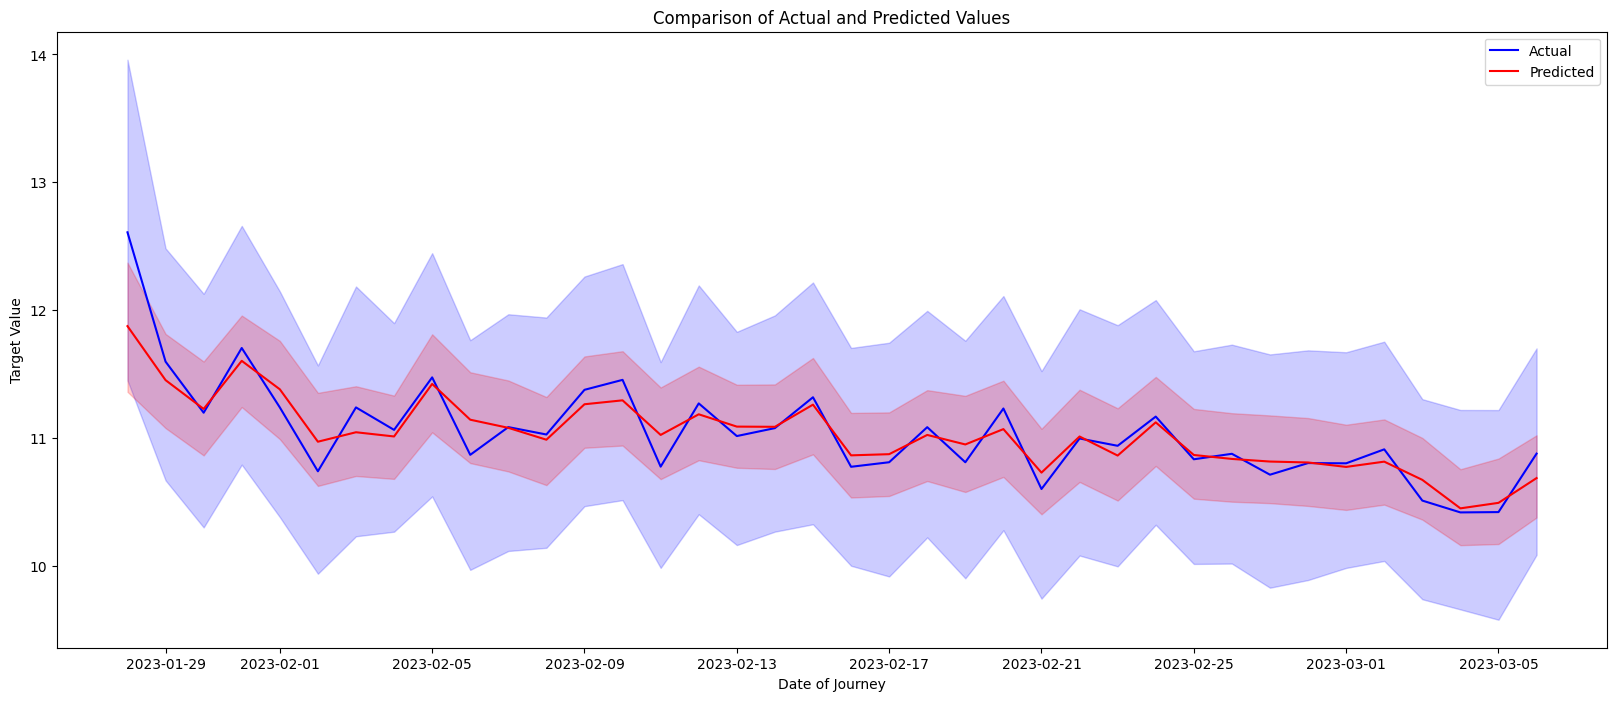

In [ ]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='demand_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='demand_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

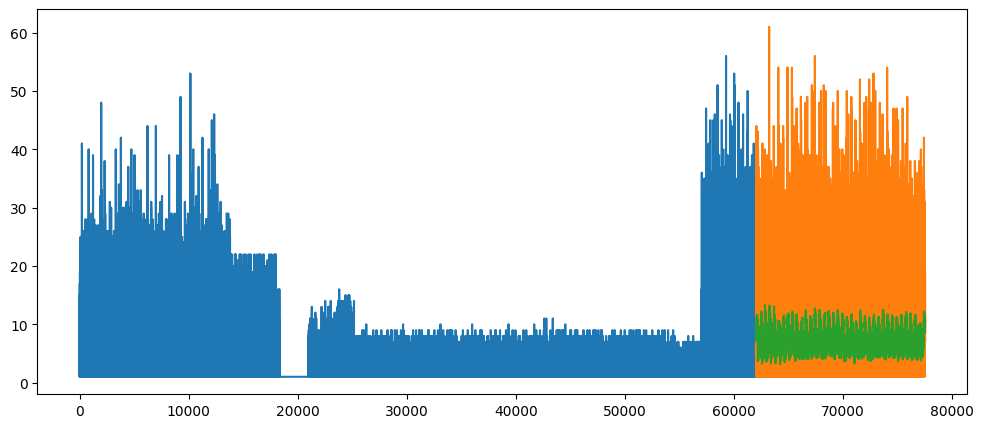

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(subset['total_passengers'], seasonal='add', seasonal_periods=7, use_boxcox = 0.01)

model_fit = model.fit()

predictions = model_fit.predict(start=train_size, end=len(subset)-1)

plt.figure(figsize=(12,5))

plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predictions')

In [ ]:
print(f"RMSE: {RMSE(test, predictions)}")
print(f"MAPE: {MAPE(test, predictions)}")

models_dict["HoltWinters"] = [model, RMSE(test, predictions), MAPE(test, predictions)]

RMSE: 10.009204078272765
MAPE: 125.9144415012659


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

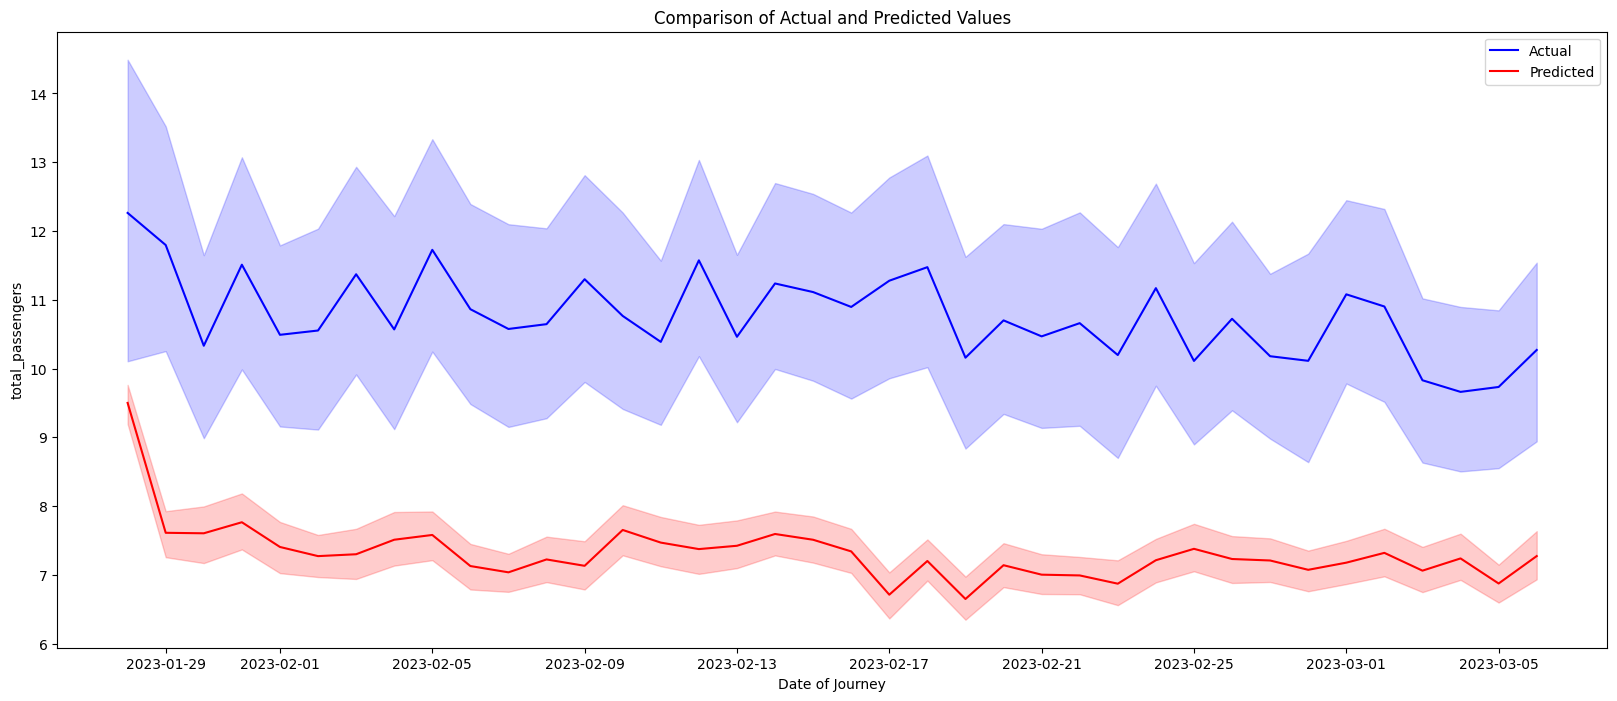

In [ ]:
out=pd.DataFrame({'demand_actual':test,'demand_pred':predictions})
result=passengers_df.merge(out,left_index=True,right_index=True)

airline_df = result[result['Airline']==8]
airline_df = airline_df[airline_df['Class']==1]

plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='demand_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='demand_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('total_passengers')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

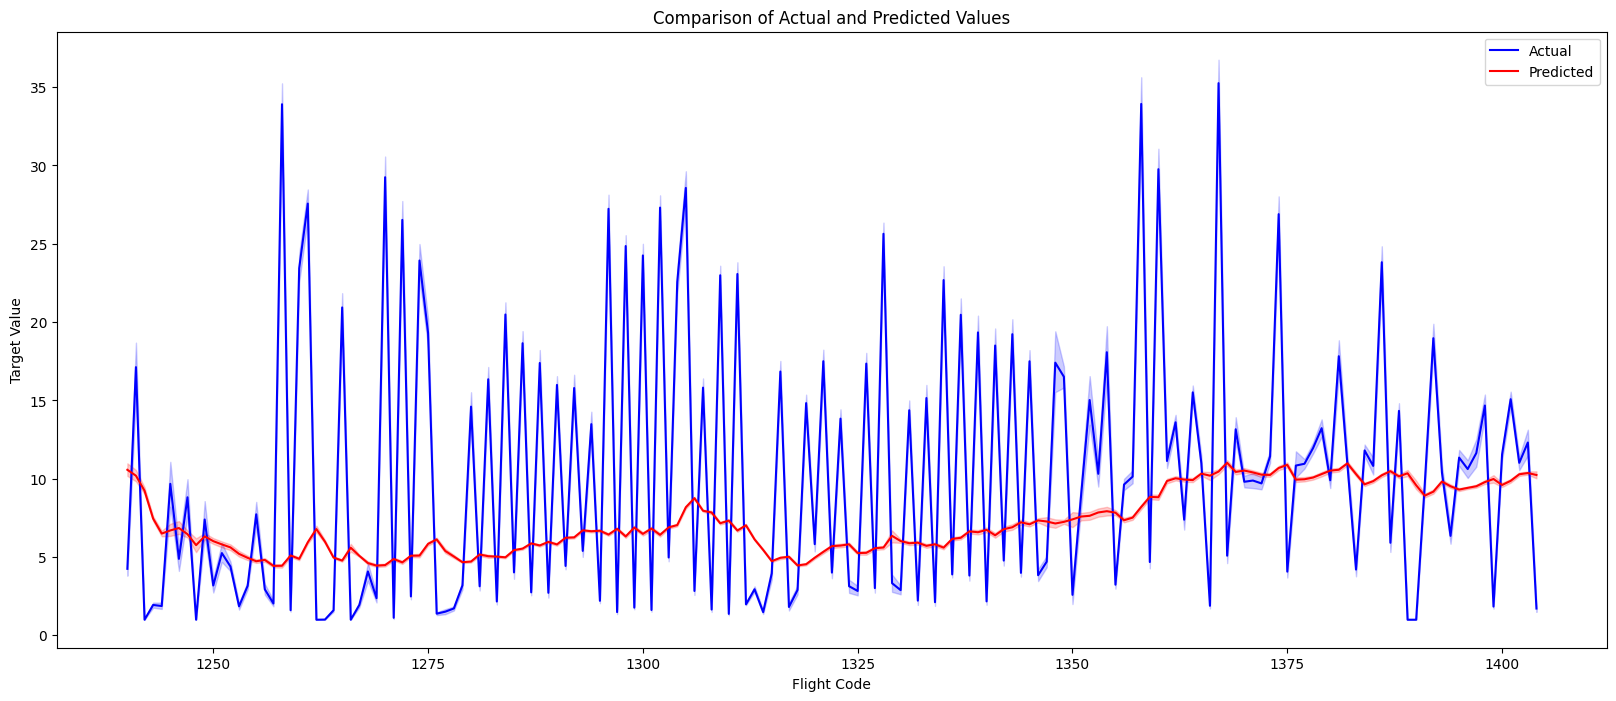

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='demand_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='demand_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ["Model", "RMSE", "MAPE"]
models_df


,Model,RMSE,MAPE
SARIMAX,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,8.132618,179.164356
RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",1.506575,13.08934
HoltWinters,<statsmodels.tsa.holtwinters.model.Exponential...,10.009204,125.914442
